<a href="https://colab.research.google.com/github/NajlaFairuzAzzahra/Aplikasi-Regresi-untuk-Pemecahan-Problem_Metode-Numerik_Najla-Fairuz/blob/main/Aplikasi_Regresi_untuk_Pemecahan_Problem_Metode_Numerik_Najla_Fairuz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
# Membaca data dari file CSV
file_path = 'Student_Performance.csv'
data = pd.read_csv(file_path)

# Mengambil kolom yang diperlukan
x = data['Sample Question Papers Practiced'].values
y = data['Performance Index'].values

# Membentuk ulang data untuk sklearn
x_reshaped = x.reshape(-1, 1)

# Membuat dan melatih model regresi linear
model_linear = LinearRegression()
model_linear.fit(x_reshaped, y)
y_pred_linear = model_linear.predict(x_reshaped)

# Membuat dan melatih model regresi eksponensial
# Transformasi ln(y) = ln(C) + b*x untuk model eksponensial
log_y = np.log(y)
model_exp = LinearRegression()
model_exp.fit(x_reshaped, log_y)
log_C_exp = model_exp.intercept_
b_exp = model_exp.coef_[0]
C_exp = np.exp(log_C_exp)
y_pred_exp = C_exp * np.exp(b_exp * x)

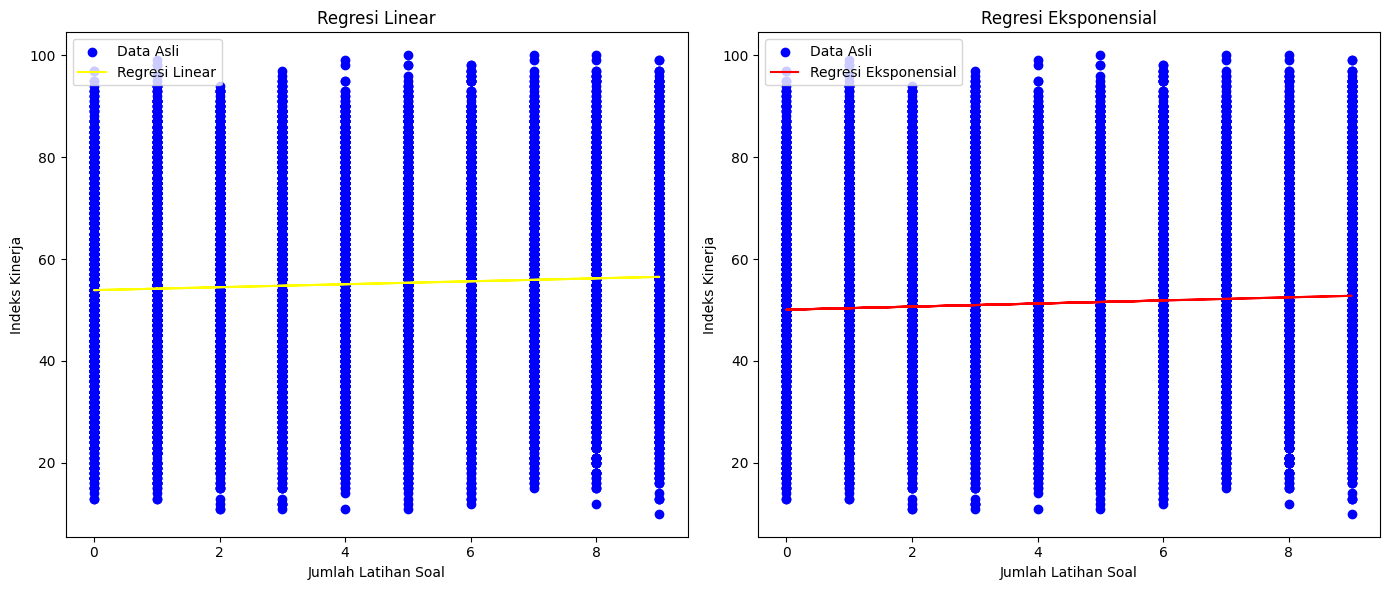

In [7]:
# Plot data asli dan hasil regresi
plt.figure(figsize=(14, 6))

# Plot regresi linear
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data Asli')
plt.plot(x, y_pred_linear, color='yellow', label='Regresi Linear')
plt.xlabel('Jumlah Latihan Soal')
plt.ylabel('Indeks Kinerja')
plt.title('Regresi Linear')
plt.legend()

# Plot regresi eksponensial
plt.subplot(1, 2, 2)
plt.scatter(x, y, color='blue', label='Data Asli')
plt.plot(x, y_pred_exp, color='red', label='Regresi Eksponensial')
plt.xlabel('Jumlah Latihan Soal')
plt.ylabel('Indeks Kinerja')
plt.title('Regresi Eksponensial')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Menghitung RMS galat
rms_error_linear = np.sqrt(mean_squared_error(y, y_pred_linear))
rms_error_exp = np.sqrt(mean_squared_error(y, y_pred_exp))

print(f"RMS galat - Regresi Linear: {rms_error_linear}")
print(f"RMS galat - Regresi Eksponensial: {rms_error_exp}")

RMS galat - Regresi Linear: 19.19360524526426
RMS galat - Regresi Eksponensial: 19.562797346139128
